In [ ]:
# Referans: 
#https://learnopencv.com/homography-examples-using-opencv-python-c/
#https://en.wikipedia.org/wiki/Homography_(computer_vision)

In [ ]:
# Homography nedir? -> 2 aynı düzlemde olan noktalar arasında kurulan ilişkidir 

In [ ]:
# Aslında 1 matristir ve bu matris sayesinde 2 nokta arasında ilişki kurarız

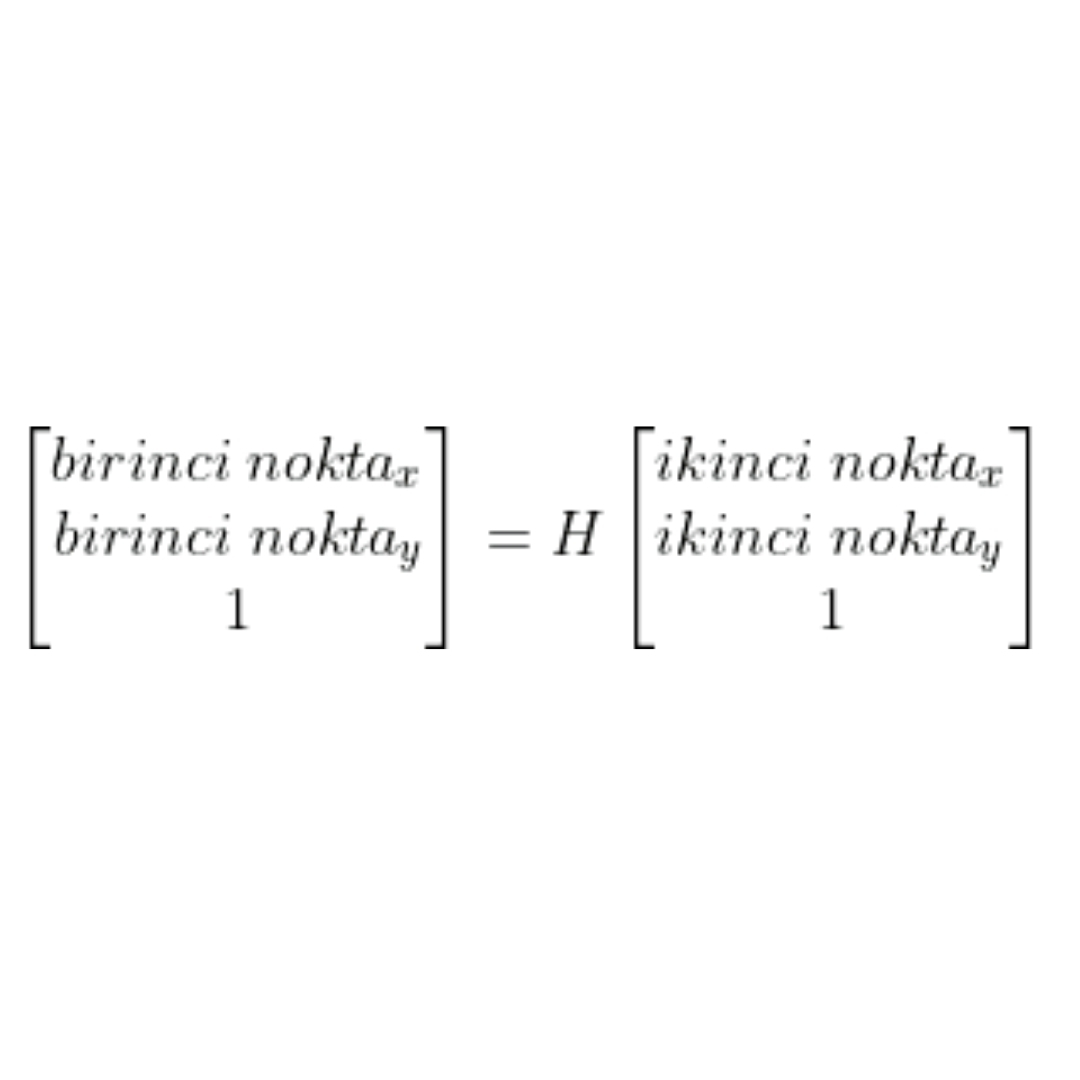

In [75]:
# Ne işimize yarar? -> 2 resim arasında bağ kurabilmemizi sağlar

In [80]:
import cv2

In [81]:
import numpy as np

In [82]:
imge = cv2.imread("arduino.jpg", 1)

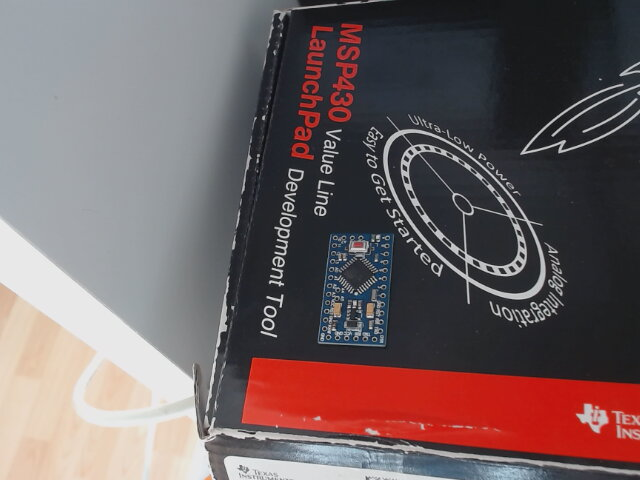

In [83]:
from google.colab.patches import cv2_imshow
cv2_imshow(imge)

In [84]:
# Arduino'nun pixel değerleri
ust_sol_kose_pixel = [330, 233]
ust_sag_kose_pixel = [393, 233]
alt_sol_kose_pixel = [318, 341]
alt_sag_kose_pixel = [385, 344]

pixel_koord = np.array([ust_sol_kose_pixel, ust_sag_kose_pixel, alt_sol_kose_pixel, alt_sag_kose_pixel])

In [85]:
# Arduino'nun gerçek boyutları
ust_sol_kose_metrik = [0, 0]
ust_sag_kose_metrik = [18, 0]
alt_sol_kose_metrik = [0, 33]
alt_sag_kose_metrik = [18, 33]

metrik_koord = np.array([ust_sol_kose_metrik, ust_sag_kose_metrik, alt_sol_kose_metrik, alt_sag_kose_metrik])*10

In [86]:
# Artık homograhy'yi bulalım
H, _ = cv2.findHomography(
    pixel_koord, 
    metrik_koord
    )

In [87]:
# bakalım ne bulmuşuz?
print(H)

[[ 4.13573049e+00  4.59525609e-01 -1.47186053e+03]
 [-3.15718004e-16  4.59939597e+00 -1.07165926e+03]
 [ 5.82028818e-04  9.38919933e-04  1.00000000e+00]]


In [89]:
# Resmi eğelim, bükelim
imge_bukulmus = cv2.warpPerspective(imge, H, (500,500))

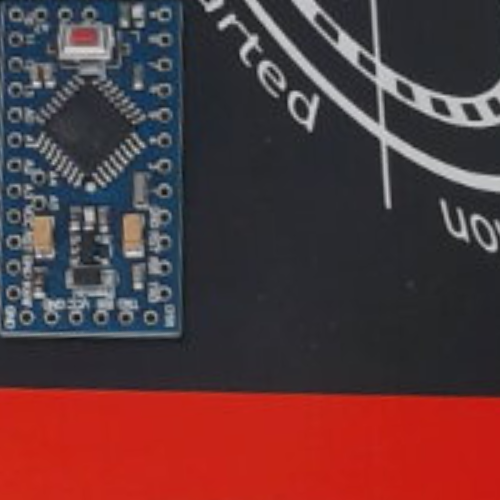

In [90]:
# Eğilmiş resim
cv2_imshow(imge_bukulmus)

In [91]:
# 5. delik gerçek koordinatları

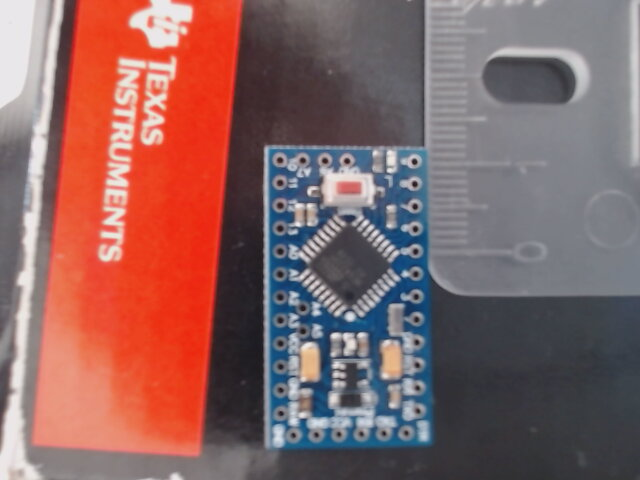

In [ ]:
# Led gerçek koordinatları

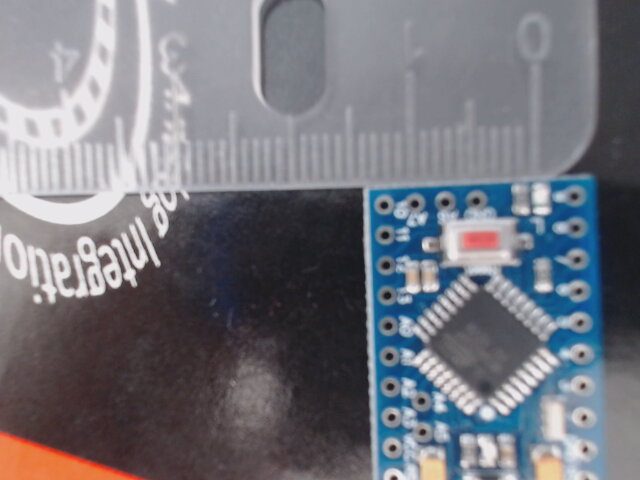

In [ ]:
# Matematik işimize nerede yarayacak gerçek yaşamda ya? 
# Burada

In [92]:
sonuc=np.matmul(H,np.array([385, 344, 1])) 
print(sonuc/sonuc[2])

[180. 330.   1.]


In [93]:
sonuc=np.matmul(H,np.array([318, 341, 1])) 
print(sonuc/sonuc[2])

[1.51053074e-13 3.30000000e+02 1.00000000e+00]


In [94]:
imge_raspi = cv2.imread("raspi.png", 1)

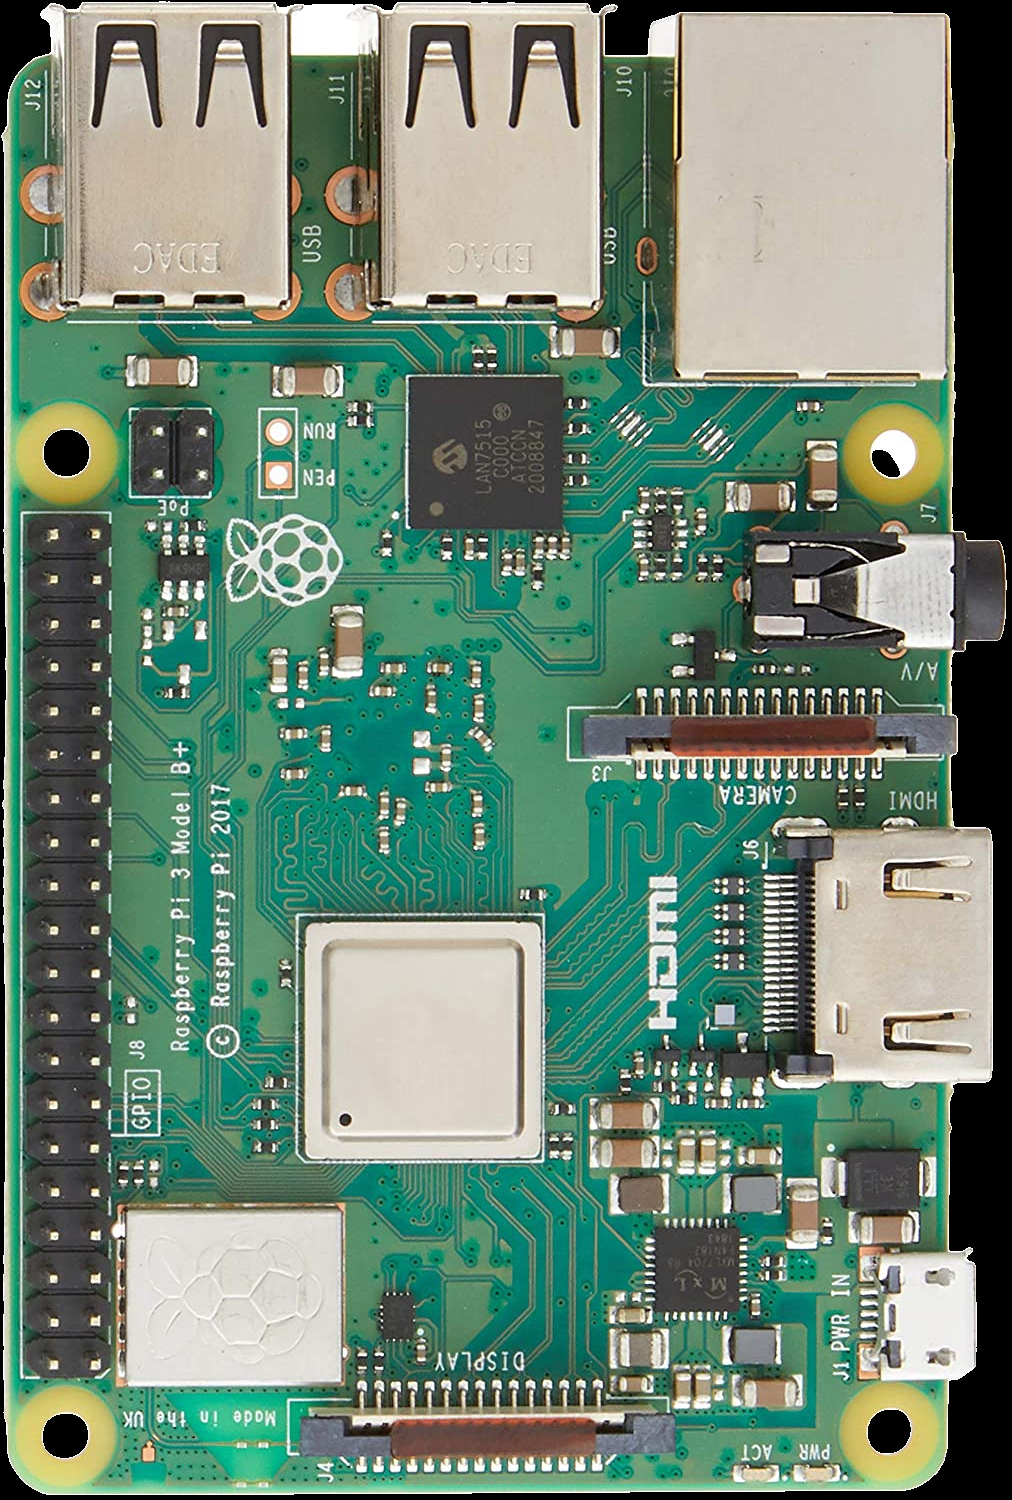

In [96]:
cv2_imshow(imge_raspi)

In [99]:
# Raspi pixel boyutları
ust_sol_kose_raspi = [0, 0]
ust_sag_kose_raspi = [1012, 0]
alt_sol_kose_raspi = [0, 1500]
alt_sag_kose_raspi = [1012, 1500]

raspi_koord = np.array([ust_sol_kose_raspi, ust_sag_kose_raspi, alt_sol_kose_raspi, alt_sag_kose_raspi])

In [100]:
H, _ = cv2.findHomography(
    raspi_koord, 
    pixel_koord
    )

In [101]:
imge_bukulmus = cv2.warpPerspective(imge_raspi, H, (imge.shape[1],imge.shape[0]))

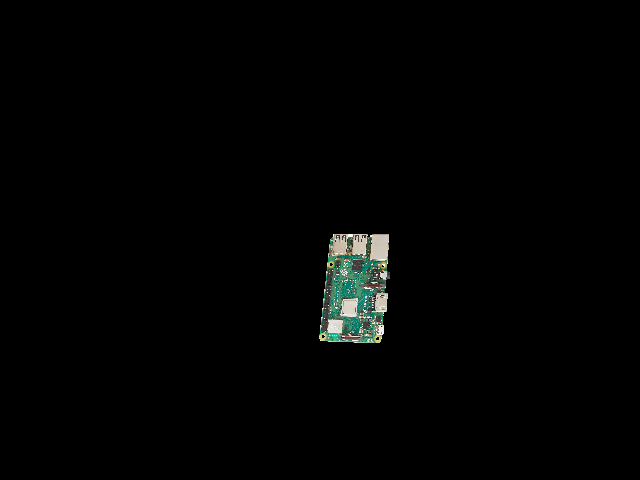

In [102]:
cv2_imshow(imge_bukulmus)

In [103]:
imge_birlestirilmis = cv2.addWeighted(imge, 0.5, imge_bukulmus, 0.5, 0)

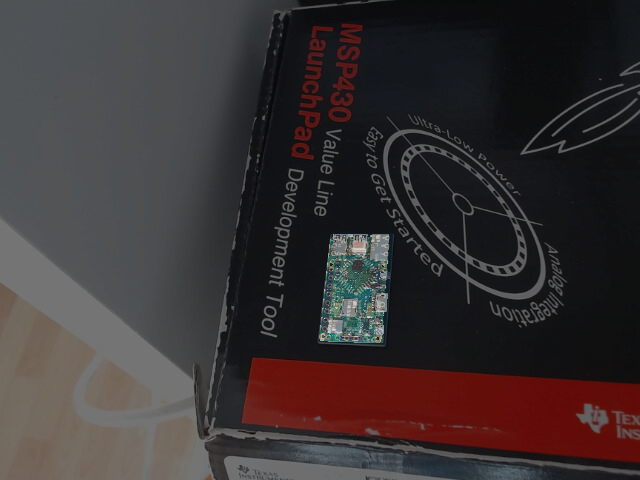

In [104]:
cv2_imshow(imge_birlestirilmis)